# Testing XGBoost
* ref: [optimizing xgboost](https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d)

In [1]:
#
import sys
PATH_TO_SRC = '/Users/masaver/Desktop/masaver/data_science_projects/sep24_bds_int_medical'
sys.path.append( PATH_TO_SRC )

# Load other requiered libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

# Import XGBoost
import xgboost as xgb

# Mute warnings
import warnings
warnings.filterwarnings("ignore")

# Import pretty printer
from pprint import pprint as pp

# Import metrics for scoring
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, mean_squared_error
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Import the preprocessign pipeline
from pipelines import *

In [2]:
# Read and display the train and test data
data_file = os.path.join('..', '..', 'data', 'raw', 'train.csv')
test_file = os.path.join('..', '..', 'data', 'raw', 'test.csv')

df_train = pd.read_csv(data_file, index_col = 0 , parse_dates = True )
df_test = pd.read_csv(test_file, index_col = 0 , parse_dates = True )

display( df_train.head() )
display( df_test.head() )

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Split the data into Features and Target variables, 
# and Standarize the features with the preprocessing pipelines
X = df_train.drop( 'bg+1:00' , axis = 1 )
y = df_train['bg+1:00']

data_pipe = pipeline
Xs = data_pipe.fit_transform( X )
Xs_test = data_pipe.transform( df_test )

display( Xs )
display( Xs_test )


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_0,0.438467,0.438722,0.439216,0.450885,0.461955,0.473156,0.418210,0.362670,0.307230,0.252080,...,-0.965502,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,-0.444492,2.226566,-0.702017,-0.450593
p01_1,0.471729,0.471989,0.472507,0.417564,0.362033,0.306632,0.251527,0.196048,0.140625,0.107547,...,-0.965502,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,-0.444492,2.226566,-0.702017,-0.450593
p01_2,0.305415,0.305652,0.306055,0.250960,0.195495,0.140108,0.107068,0.073858,0.040662,0.007486,...,-0.965502,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,-0.444492,2.226566,-0.702017,-0.450593
p01_3,0.139100,0.139315,0.139603,0.106570,0.073367,0.040194,0.007058,-0.026115,-0.059302,-0.036985,...,-0.965502,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,-0.444492,2.226566,-0.702017,-0.450593
p01_4,0.039312,0.039512,0.039731,0.006608,-0.026556,-0.059721,-0.037390,-0.015007,0.007340,0.152019,...,-0.965502,-0.946576,-0.966297,-0.961827,-0.963217,-0.458394,-0.444492,2.226566,-0.702017,-0.450593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p12_25294,0.172363,0.272384,0.306055,0.373136,0.506365,0.639680,0.707127,0.673698,0.607120,0.574499,...,-0.216549,-0.235130,-0.223186,-0.218883,-0.212696,-0.202605,-0.444492,-0.449122,1.424467,-0.450593
p12_25295,0.272152,0.305652,0.372635,0.506419,0.639595,0.706290,0.673790,0.607049,0.573799,0.507792,...,-0.216549,-0.235130,-0.223186,-0.218883,-0.212696,-0.202605,-0.444492,-0.449122,1.424467,-0.450593
p12_25296,0.305415,0.372187,0.505797,0.639702,0.706211,0.672985,0.607117,0.573724,0.507156,0.407731,...,-0.216549,-0.235130,-0.223186,-0.218883,-0.212696,-0.202605,-0.444492,-0.449122,1.424467,-0.450593


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,0.305415,0.305652,0.417023,0.528633,0.639595,0.650782,0.662678,0.673698,0.662655,0.652324,...,-0.468787,-0.474736,-0.473456,-0.469097,-0.452500,-0.293115,-0.444492,2.226566,-0.702017,-0.450593
p01_8460,0.538255,0.538524,0.539087,0.484206,0.428648,0.373242,0.340424,0.307129,0.273909,0.185373,...,1.008423,0.986249,1.877805,2.829885,2.097199,3.165936,-0.444492,-0.449122,-0.702017,2.219300
p01_8461,-0.925313,-0.925245,-0.925691,-0.926374,-0.925859,-0.958951,-0.993039,-1.025847,-1.025612,-1.026479,...,0.497479,-0.225300,-0.251421,-0.062338,1.473709,0.244698,-0.444492,-0.449122,-0.702017,-0.450593
p01_8462,-1.623834,-1.623862,-1.569305,-1.515040,-1.458780,-1.369711,-1.281957,-1.192469,-1.258860,-1.326662,...,-0.455852,-0.462448,-0.473456,-0.469097,-0.452500,-0.458394,-0.444492,-0.449122,1.424467,-0.450593
p01_8463,0.006049,0.006245,0.006441,0.195426,0.384238,0.573071,0.818249,1.062482,1.306862,1.374988,...,-0.455852,-0.474736,-0.473456,-0.469097,-0.465462,-0.458394,-0.444492,-0.449122,1.424467,-0.450593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p24_256,-0.326580,-0.326430,-0.393044,-0.526524,-0.492861,-0.492684,-0.459654,-0.459332,-0.492475,-0.526173,...,-0.552866,-0.544775,-0.408001,-0.552502,-0.549718,-0.533163,-0.444492,2.226566,-0.702017,-0.450593
p24_257,-0.758998,-0.692372,-0.692658,-0.693128,-0.825937,-0.925646,-0.859693,-0.825900,-0.792365,-0.592881,...,-0.510180,-0.534945,-0.141045,-0.307420,-0.528978,-0.391495,-0.444492,-0.449122,-0.702017,2.219300
p24_258,1.369828,1.403479,1.471219,1.606005,1.638822,1.672130,1.573878,1.540132,1.506788,1.541757,...,-0.552866,-0.554605,-0.556880,-0.552502,-0.549718,-0.543656,-0.444492,-0.449122,1.424467,-0.450593


In [4]:
# Display descriptive statistics
display( Xs.describe() )
display( Xs_test.describe() )

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_morning,day_phase_night,day_phase_noon
count,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,...,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05,1.770240e+05
mean,6.678999e-17,7.141391e-16,1.746815e-16,-1.066071e-16,-8.862518e-17,-2.568846e-18,-3.031238e-16,6.409270e-16,-4.572545e-16,3.827580e-16,...,1.592684e-16,-3.082615e-17,-2.132142e-16,-7.192768e-17,4.623922e-17,4.623922e-17,-3.901434e-17,-1.031552e-17,-3.403721e-17,-1.590276e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.022989e+00,-2.023072e+00,-2.024274e+00,-2.025959e+00,-2.025008e+00,-2.024706e+00,-2.026474e+00,-2.025578e+00,-2.025244e+00,-2.027090e+00,...,-1.085800e+00,-1.060850e+00,-1.085657e+00,-1.081161e+00,-1.083767e+00,-1.084092e+00,-4.444915e-01,-4.491221e-01,-7.020170e-01,-4.505926e-01
25%,-7.257353e-01,-7.256400e-01,-7.259481e-01,-7.264489e-01,-7.260141e-01,-7.258175e-01,-7.263467e-01,-7.259270e-01,-7.257229e-01,-7.262954e-01,...,-4.687870e-01,-4.747359e-01,-4.708894e-01,-4.690973e-01,-4.654623e-01,-4.583935e-01,-4.444915e-01,-4.491221e-01,-7.020170e-01,-4.505926e-01
50%,-1.935287e-01,-1.933603e-01,-1.933016e-01,-1.933167e-01,-1.930933e-01,-1.929402e-01,-1.929611e-01,-1.927367e-01,-1.925859e-01,-1.926361e-01,...,-3.135636e-01,-3.272858e-01,-3.104594e-01,-3.151192e-01,-3.099138e-01,-3.009851e-01,-4.444915e-01,-4.491221e-01,-7.020170e-01,-4.505926e-01
75%,5.382552e-01,5.385243e-01,5.390874e-01,5.397402e-01,5.396728e-01,5.397660e-01,5.404440e-01,5.404000e-01,5.404775e-01,5.411454e-01,...,-1.863900e-02,-5.204564e-02,-3.195302e-02,-4.694056e-02,-3.900025e-02,-1.908993e-03,-4.444915e-01,-4.491221e-01,1.424467e+00,-4.505926e-01
max,6.492316e+00,6.493403e+00,6.498071e+00,6.504157e+00,6.501724e+00,6.501330e+00,6.507695e+00,6.505467e+00,6.504948e+00,6.511459e+00,...,1.392819e+01,1.320126e+01,1.381123e+01,1.381238e+01,1.396166e+01,1.414124e+01,2.249762e+00,2.226566e+00,1.424467e+00,2.219300e+00


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_morning,day_phase_night,day_phase_noon
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,...,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000
mean,0.184348,0.186197,0.186528,0.184169,0.180827,0.178788,0.180203,0.179141,0.178024,0.179388,...,-0.135876,-0.155548,-0.132186,-0.125616,-0.138925,-0.135583,0.020570,-0.021041,0.009923,0.016126
std,1.115628,1.113388,1.111815,1.107850,1.104784,1.100944,1.095454,1.092787,1.090491,1.088136,...,0.907133,0.853845,0.901787,0.924320,0.908846,0.945917,1.018330,0.981031,1.003667,1.014172
min,-1.823411,-2.023072,-1.891112,-2.025959,-1.958393,-1.924791,-1.837567,-1.858956,-1.891960,-2.027090,...,-1.087094,-1.059621,-1.083090,-1.078594,-1.080527,-1.082780,-0.444492,-0.449122,-0.702017,-0.450593
25%,-0.625947,-0.592570,-0.592786,-0.593166,-0.603886,-0.592598,-0.593000,-0.592629,-0.592439,-0.592881,...,-0.533463,-0.526651,-0.531853,-0.530047,-0.539348,-0.543656,-0.444492,-0.449122,-0.702017,-0.450593
50%,-0.060477,-0.060290,-0.060140,-0.060034,-0.093171,-0.065272,-0.059615,-0.059439,-0.059302,-0.053662,...,-0.463613,-0.462448,-0.458055,-0.462682,-0.465462,-0.458394,-0.444492,-0.449122,-0.702017,-0.450593
75%,0.804358,0.771397,0.774894,0.750772,0.750621,0.739595,0.740464,0.740346,0.740404,0.766283,...,-0.147669,-0.181064,-0.150992,-0.164670,-0.159550,-0.184240,-0.444492,-0.449122,1.424467,-0.450593
max,6.425790,6.426868,6.431490,6.293126,6.312981,6.334806,6.396573,6.449926,6.504948,6.511459,...,7.743828,7.050134,7.386329,6.935969,9.026883,9.018908,2.249762,2.226566,1.424467,2.219300


In [5]:
# Calculate a CV score' for the base model on the entire data
cv = KFold( n_splits = 5 , shuffle = True , random_state = 17 )
scores = cross_val_score( xgb.XGBRegressor(  random_state = 17  ) , Xs , y , cv=cv, scoring = rmse_scorer )
score = -1 * scores.mean()
print( scores )
print( f'CV RMSE score: {round( score , 3 )}' )

[-1.81579593 -1.83097289 -1.82638867 -1.82086531 -1.80270606]
CV RMSE score: 1.819


In [6]:
# Do a SHAP analysis
#!pip uninstall numpy -y
#!pip install numpy==2.0.0
#!pip install shap==0.46.0

import shap
xgb_model = xgb.XGBRFRegressor( random_state = 17 )
xgb_model.fit( Xs , y )
explainer = shap.Explainer( xgb_model )
shap_values = explainer( Xs )

In [7]:
def get_top_features( shap_values , df = Xs , n = 10 ):
    mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

    # Create a DataFrame with feature names and their mean absolute SHAP values
    feature_importance_df = pd.DataFrame({
        'feature': df.columns, 
        'mean_abs_shap_value': mean_abs_shap_values
    })

    # Sort features by mean absolute SHAP value in descending order
    feature_importance_df = feature_importance_df.sort_values(by='mean_abs_shap_value', ascending=False)

    # Get the top-N features (for example, top 10 features)
    top_n_features = feature_importance_df.head( n )
    return list( top_n_features['feature'] )

In [8]:
top_features = get_top_features( shap_values , n = 15 )
print( Xs.shape )
pp(f'Top 15 features for the base model: { top_features }' )

(177024, 292)
("Top 15 features for the base model: ['bg-0:00', 'bg-0:05', 'hr-0:00', "
 "'bg-0:15', 'bg-0:20', 'bg-0:10', 'bg-0:25', 'cals-1:50', 'cals-5:20', "
 "'bg-0:30', 'cals-5:25', 'cals-5:05', 'hr-0:05', 'insulin-0:20', 'bg-0:35']")


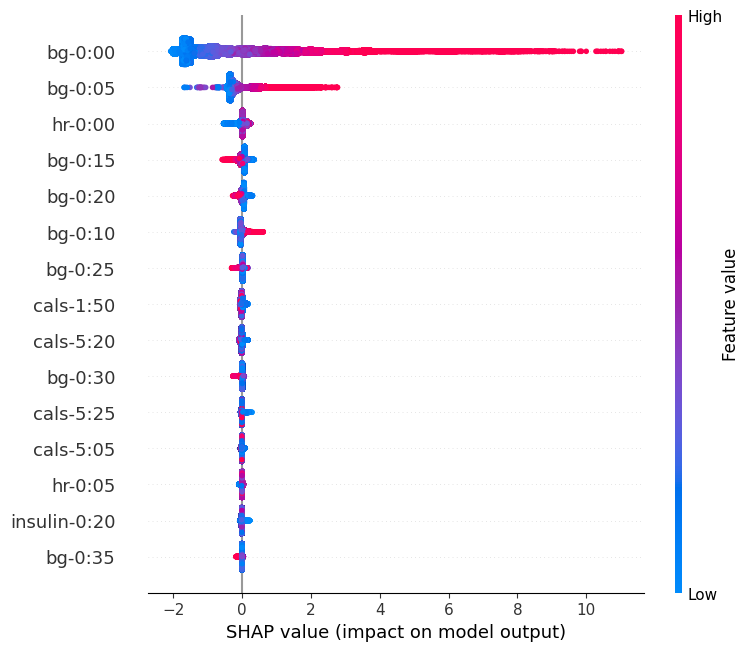

In [9]:
# make a bee swam plot of the shap values
shap.plots.beeswarm( shap_values[:,top_features] , max_display = len( top_features ) )

In [10]:
# Calculate a CV score' for the base model using only the top features
cv = KFold( n_splits = 5 , shuffle = True , random_state = 17 )
scores = cross_val_score( xgb.XGBRegressor(  random_state = 17  ) , Xs[ top_features ] , y , cv=cv, scoring = rmse_scorer )
score = -1 * scores.mean()
print( scores )
print( f'CV RMSE score with Top Features: {round( score , 3 )}' )

[-1.91500031 -1.9264801  -1.92153266 -1.92043241 -1.89964593]
CV RMSE score with Top Features: 1.917


In [11]:
# Test xgboost with HyperOpt

#!pip install hyperopt==0.2.7
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll import scope
from sklearn.model_selection import cross_val_score, KFold
#from sklearn.metrics import root_mean_squared_error

# Define the hyperparameter space
space = {
    'max_depth': scope.int(hp.quniform('max_depth', 2, 6, 1)),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.3),
    'n_estimators': scope.int(hp.quniform('n_estimators', 10 , 200 , 10)),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'min_child_weight': scope.int(hp.quniform('min_child_weight', 1, 10, 1)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', .5, 1),
    'reg_lambda': hp.uniform('reg_lambda', .5, 1),
}

# Define the objective function to minimize
def objective( params ):

    params['max_depth'] = int(params['max_depth'])
    xgb_model = xgb.XGBRegressor(**params,random_state=17)

    # Perform 5-fold cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=17)
    scores = cross_val_score(xgb_model, Xs[ top_features ] , y , cv=cv, scoring='neg_root_mean_squared_error')
    score = scores.mean()
    return {'loss': -score, 'status': STATUS_OK}

# Perform the optimization
trials = Trials()
best_params = fmin(objective, space, algo = tpe.suggest , max_evals = 100 , trials = trials )
print("Best set of hyperparameters: ", best_params)


100%|██████████| 100/100 [02:42<00:00,  1.62s/trial, best loss: 1.8991533349338234]
Best set of hyperparameters:  {'colsample_bytree': np.float64(0.9693766979606024), 'gamma': np.float64(0.27706945811478334), 'learning_rate': np.float64(0.21054434453689996), 'max_depth': np.float64(6.0), 'min_child_weight': np.float64(3.0), 'n_estimators': np.float64(190.0), 'reg_alpha': np.float64(0.9576550641581322), 'reg_lambda': np.float64(0.7115144950309011), 'subsample': np.float64(0.8435244069609669)}


In [12]:
# Using the best params and Top features, calculate a CV score for the model
best_params['max_depth'] = int( best_params['max_depth'] )
best_params['min_child_weight'] = int( best_params['min_child_weight'] )
best_params['n_estimators'] = int( best_params['n_estimators'] )
pp( best_params )
xgb_model_hyper = xgb.XGBRegressor( **best_params , random_state = 17 )
cv = KFold( n_splits = 5 , shuffle = True , random_state = 17 )
scores = cross_val_score( xgb_model_hyper , Xs[ top_features ] , y , cv=cv, scoring = rmse_scorer )
score = -1 * scores.mean()
print( scores )
print( f'CV RMSE score with Top Features & Best Params: {score}' )

{'colsample_bytree': np.float64(0.9693766979606024),
 'gamma': np.float64(0.27706945811478334),
 'learning_rate': np.float64(0.21054434453689996),
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 190,
 'reg_alpha': np.float64(0.9576550641581322),
 'reg_lambda': np.float64(0.7115144950309011),
 'subsample': np.float64(0.8435244069609669)}
[-1.89570232 -1.90940912 -1.90713332 -1.90044204 -1.88307987]
CV RMSE score with Top Features & Best Params: 1.8991533349338234


In [13]:
# Prepare table for submission
xgb_model_hyper.fit( Xs[ top_features ] , y )
preds = xgb_model_hyper.predict( Xs_test[ top_features ] )
preds_df = pd.DataFrame({ 'id' : Xs_test.index  , 'bg+1:00' : preds })
preds_df.to_csv( './submissions/03_xgboost_HyperOpt_v3.csv' , index=False )
preds_df

,id,bg+1:00
0,p01_8459,9.552516
1,p01_8460,6.798518
2,p01_8461,7.994426
3,p01_8462,9.604233
4,p01_8463,7.328750
...,...,...
3639,p24_256,7.176666
3640,p24_257,9.907283
3641,p24_258,7.527245
3642,p24_259,8.557874


RMSE: 1.7435309160586776
R2: 0.6614189386313107


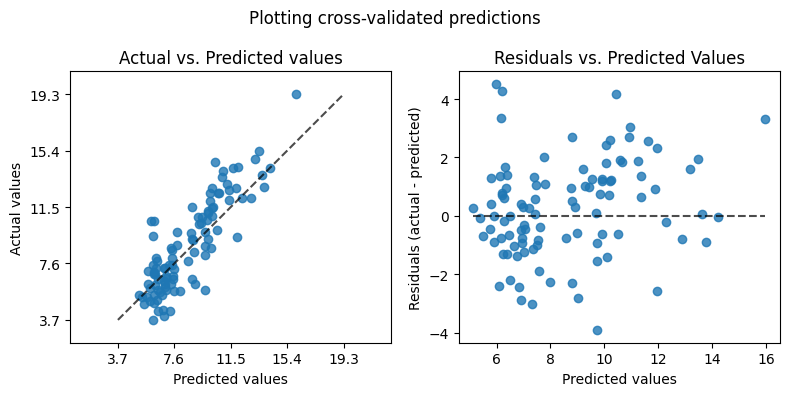

In [14]:
from sklearn.metrics import root_mean_squared_error, r2_score, PredictionErrorDisplay
import matplotlib.pyplot as plt

y_pred = xgb_model_hyper.predict(X=Xs[ top_features ])
print(f'RMSE: {root_mean_squared_error(y_true=y, y_pred=y_pred)}')
print(f'R2: {r2_score(y_true=y, y_pred=y_pred)}')

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true=y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true=y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();

In [15]:
# save the Model
import pickle

res = {
    'model':xgb_model_hyper,
    'top_features':top_features,
    'best_params':best_params
}

pp( res )

# Save to pickle file
with open('./models/03_xgboost_HyperOpt.pkl', 'wb') as f:
    pickle.dump(res, f)

f.close()

{'best_params': {'colsample_bytree': np.float64(0.9693766979606024),
                 'gamma': np.float64(0.27706945811478334),
                 'learning_rate': np.float64(0.21054434453689996),
                 'max_depth': 6,
                 'min_child_weight': 3,
                 'n_estimators': 190,
                 'reg_alpha': np.float64(0.9576550641581322),
                 'reg_lambda': np.float64(0.7115144950309011),
                 'subsample': np.float64(0.8435244069609669)},
 'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=np.float64(0.9693766979606024), device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None,
             gamma=np.float64(0.27706945811478334), grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=np.float64(0.21054434

In [16]:
# # Load the model 
# with open('./models/03_xgboost_HyperOpt.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

# f.close()
# pp(loaded_dict)